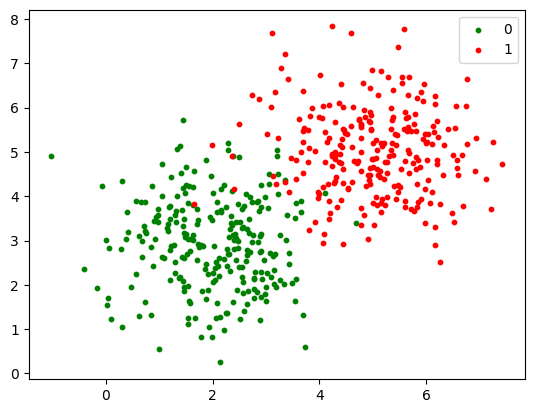

In [363]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# this dataset can work well also with a perceptron
centers = [[2, 3], [5, 5]]
# centers = [[3, 3], [6, 5]]
num_classes = len(centers)
num_samples = 512 
data, labels = make_blobs(n_samples=num_samples, centers=np.array(centers), random_state=1337)

colours = ('green', 'red', 'blue')

# visualization of the created dataset
fig, ax = plt.subplots()
for n_class in range(0, num_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))
ax.legend(loc='upper right')

In [364]:
X0 = np.ones(num_samples)
X = np.stack((X0, data[:, 0], data[:, 1]), axis=1)
y = labels
for i in range(len(y)):
  if y[i] == 0: y[i] = -1

w = np.random.uniform(low=-1, high=1, size=3)
print(y)

[ 1 -1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1 -1
 -1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1
 -1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1 -1  1
 -1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1
  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1  1
 -1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1
  1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1
 -1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1
  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1
  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1  1
  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1

sklearn.perceptron accuracy = 0.961038961038961
# of errors = 15.0
Parameters = [-2.21198247  0.35410086  0.24283878]
errors-epoch: [263. 244. 190.  83.  92.  68.  85.  51.  44.  41.  41.  34.  27.  28.
  30.  18.  17.  19.  17.  26.  17.  19.  18.  18.  15.  18.  16.  15.
  16.  16.  18.  14.  18.  14.  16.  15.  18.  15.  17.  15.  16.  17.
  15.  16.  14.  14.  17.  15.  19.  15.  15.  17.  14.  17.  17.  16.
  17.  16.  16.  15.  17.  15.  17.  14.  17.  16.  17.  17.  17.  16.
  17.  15.  15.  18.  15.  15.  18.  15.  17.  17.  15.  15.  15.  17.
  18.  16.  17.  16.  15.  15.  16.  18.  18.  17.  16.  16.  18.  17.
  18.  15.  18.  15.  18.  16.  15.  18.  16.  17.  18.  17.  15.  16.
  15.  15.  15.  16.  17.  18.  15.  15.  15.  16.  18.  16.  17.  18.
  15.  15.  18.  16.  17.  17.  16.  16.  18.  18.  15.  17.  15.  15.
  15.  18.  15.  15.  15.  15.  15.  18.  17.  17.  15.  18.  15.  17.
  17.  17.  18.  15.  16.  18.  15.  15.  18.  16.  18.  17.  17.  17.
  18.  15.  16. 

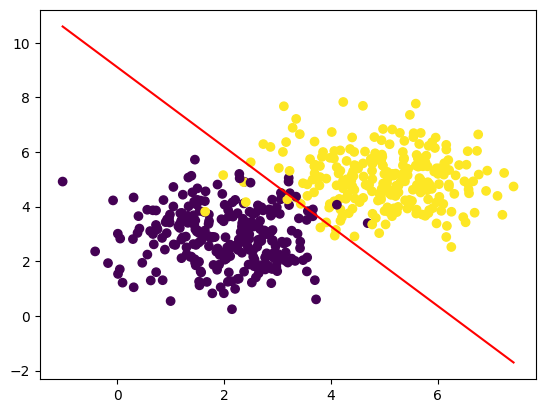

In [365]:
def sse(X, y, w):
  return np.sum(np.square(y - np.dot(X, w)))
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pp = Perceptron(max_iter=500, tol=0.001, eta0=0.01, random_state=1337)
pp.fit(X_train, y_train)
y_pred = pp.predict(X_test)
print(f"sklearn.perceptron accuracy = {accuracy_score(y_test, y_pred)}")

eta = 1e-3
batch_size = 8
max_epochs = 250

# sse_epochs = np.zeros(max_epochs + 1)
errors_epoch = np.zeros(max_epochs + 1)

for epoch in range(max_epochs):
  # sse_epochs[epoch] = sse(X, y, w)
  errors_epoch[epoch] = sum((y * np.sign(np.dot(X, w))) < 0)

  # generate a random permutation
  # we shuffle points to see them in different order during
  # the mini batch learning
  rand_perm = np.random.permutation(range(y.shape[0]))
  X = X[rand_perm, :]
  y = y[rand_perm]

  # mini-batch learning
  for j in range(0, y.shape[0], batch_size):
    X_batch = X[j : (j+batch_size), :]
    y_batch = y[j:(j+batch_size)]
    # errors = y_batch - np.dot(X_batch, w)
    # w = w + eta * np.dot(X_batch.T, errors)
    w = w + eta * np.dot(X_batch.T, (y_batch - np.dot(X_batch, w)))
  
  errors_epoch[epoch + 1] = sum(y * np.sign(np.dot(X, w)) < 0)

print(f"# of errors = {errors_epoch[-1]}")
print(f"Parameters = {w}")

plt.scatter(X[:, 1], X[:, 2], c=y)
plt.plot(
  [np.min(X[:, 1]), np.max(X[:, 1])],
  [
    np.min(X[:, 1]) * (-w[1] / w[2]) - w[0] / w[2],
    np.max(X[:, 1]) * (-w[1] / w[2]) - w[0] / w[2],
  ],
  c="red",
)

print(f"errors-epoch: {errors_epoch}")

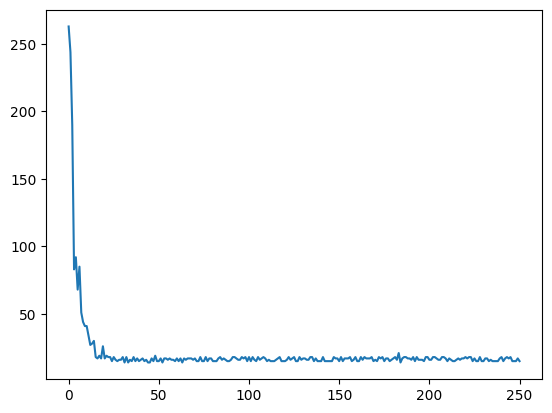

In [366]:
plt.plot(range(max_epochs + 1), errors_epoch)